# Activity 6 - Spectroscopic Binary

In this activity, we're going to look at the radial velocity curve of a spectroscopic binary and determine the orbital & stellar parameters.

(In case you're curious, this star is BT Vulpeculae and the data is from [Torres et al. 2020](https://iopscience.iop.org/article/10.3847/1538-4357/ab85c6/pdf).)

# Part 1 - Radial velocity curve

Upload the files "rv_data_primary.txt" and "rv_data_both.txt"  into Colab so you can use them.

"rv_data_primary.txt" = data for only the primary star. This file has two columns:
- time = observation date (in Heliocentric Julian Date, aka a form of days)
- rv1 = radial velocity (in km/s) of the primary star

"rv_data_both.txt" = data for both stars. This file has three columns:
- time = observation date (in Heliocentric Julian Date, aka a form of days)
- rv1 = radial velocity (in km/s) of the primary star
- rv2 = radia velocity (in km/s) of the secondary star

## Step 1

Let's star by reading in the radial velocities (RVs) for our binary.

a) Read the "rv_data_both.txt" file into a table using the *astropy.io.ascii.read()* function.

b) Pull out the time and radial velocity columns into their own arrays by indexing the table with the column name.

In [1]:
# always start by importing useful packages
import numpy as np
import matplotlib.pyplot as plt
from astropy.io import ascii
%matplotlib inline

In [2]:
# read in data
data = ascii.read('rv_data_both.txt')

# print it out to see what it looks like
print(data)

   time      rv1     rv2  
---------- ------- -------
55368.9509 -139.96  136.65
55527.5607 -142.87  135.21
55850.5866 -129.49  121.77
55867.7441  -115.7    97.0
55903.5554  103.22 -177.41
56010.9947    53.1  -122.1
56023.9539  -151.9   136.7
56024.0077 -143.75  133.62
56052.9744   92.58 -164.36
56058.9383    53.5  -107.2
       ...     ...     ...
57527.8661   -86.0    62.0
57542.8975  -141.8   141.9
57698.7152    95.1  -178.0
 57735.618  -113.6    97.2
57908.8385    39.3  -106.2
57934.8055    88.6  -168.0
 58003.782  -103.8    86.6
 58222.961  -136.4   118.1
 58252.851  -116.1    96.6
58289.9256    82.7  -144.1
58376.6446    87.7  -149.6
Length = 91 rows


In [3]:
# pull out each column into it's own array
time = data["time"]
rv1 = data["rv1"]
rv2 = data["rv2"]

## Step 2

Make a plot of the primary star's RV's as a function of time, then overplot the secondary star's RV's with a different symbol/color. Be sure to include appropriate axis labels with units.

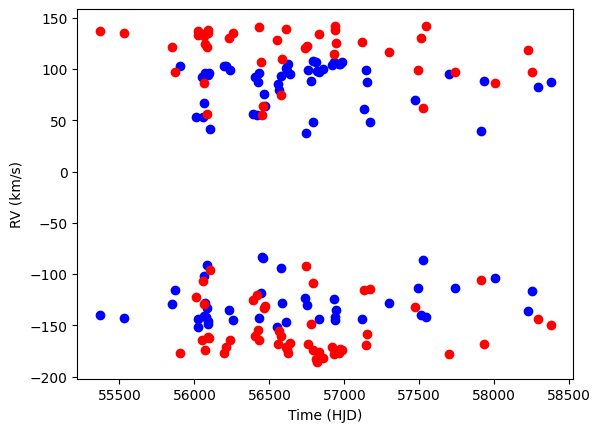

In [4]:
# make plot here
plt.plot(time, rv1, 'bo')
plt.plot(time, rv2, 'ro')

plt.xlabel('Time (HJD)')
plt.ylabel('RV (km/s)')

plt.show()


This plot won't look very pretty, since all of the data overlap and it doesn't take into account the orbital cycles...

## Step 3

Let's make a phase folded RV curve. We know the orbital period of this binary is $P=1.1412$ days and the reference time is $t_0 = 56818.8$ days from the light curve data.

Calculate the orbital phase of the data using the equation:

$$phase = \frac{(time - t_0)}{period} ~mod ~1 $$

which calculates the number of orbital cycles that have happened since a reference time ($t_0$), then uses the modulo operator to only keep the remainder (decimal values 0-1).  (For example, 5.2 mod 1 = 0.2 and 8.7 mod 1 = 0.7.)

Hint: You enter modulo into python using a "%" sign:
```
# example --> y = x mod 1
y = x % 1
```

In [5]:
period = 1.1412  # days
t0 = 56818.8     # days

# calculate orbital phase here
phase = (time - t0)/period % 1


## Step 4

Copy your plot from Step 2 into the cell below, then modify it to plot the RV as a function of orbital phase instead. Make sure to change the axis labels as needed.

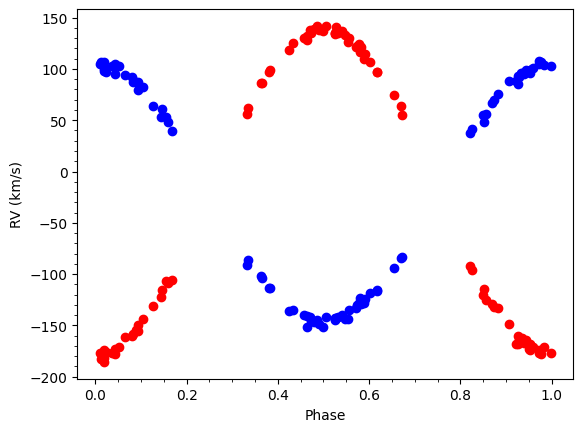

In [9]:
# make plot here
plt.plot(phase, rv1, 'bo')
plt.plot(phase, rv2, 'ro')

plt.xlabel('Phase')
plt.ylabel('RV (km/s)')

plt.minorticks_on()          # this shows the minor tick marks
plt.show()
#plt.savefig('rv_curve.png', dpi=200)

**Question:** Based on the RV curve, what is the estimated velocity semi-amplitude of each star?

\

# Part 2 - Orbit fiting

We're going to use the "[BinaryStarSolver](https://pypi.org/project/BinaryStarSolver/)" package to fit for the orbital parameters of this binary.  

This package is not automatically included with Colab, so first we need to install it by running the cell below. (It may take a minute or two, but **you will only need to do this once**.)

In [ ]:
# install package into Colab
!pip install BinaryStarSolver

# import it into our notebook
from binarystarsolve.binarystarsolve import StarSolve

## Step 5

First, we're going to pretend this is a single-lined binary and only fit for the primary star's orbit. Then we will fit for both stars together (as a double-lined binary) so we can compare the results.

The "StarSolve" function will take our RV data, fit for the spectroscopic orbit, and give back the best fit parameters & uncertainties.

To run the fitting code:

-  Tell the function which data set we want by entering the file name into the empty quotes in the call sequence. We want the data file that has **ONLY the primary star's RVs**.

-  Run the cell to start the fitting function!

If all goes well, it will make some plots of the radial velocities versus time and versus phase with a model fits shown in orange.


Finding initial guesses...
Minimizing...


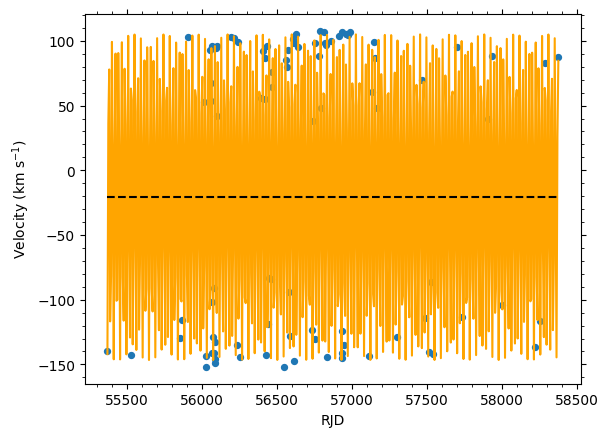

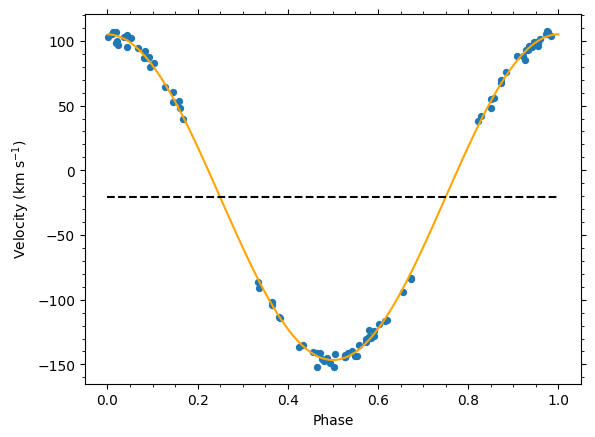

In [ ]:
# fit for the parameters of the primary star
param1, error1 = StarSolve(data_file = "rv_data_primary.txt", star = "primary", Pguess = period, zeroEcc = True)

Let's see our results! The best fit parameters are saved in a "param1" array and the uncertainties are in the "error1" array. The cell below will pull out the period and semi-amplitude value into their own variables.

Add onto the cell to print out these values with their errors and units.

In [ ]:
# Primary star results
# params = [γ, K, ω, e, T0, P, a, f(M)]
period = param1[5]        # orbital period
period_error = error1[5]  # uncertainty in orbital period
K1 = param1[1]            # semi-amplitude of primary
K1_error = error1[1]      # uncertainty in semi-amplitude of primary

print('Period = ', period, ' +\- ', period_error, ' days')
print('K1 = ', K1, ' +\- ', K1_error, ' km/s')


Period =  1.1412  +\-  5.10344e-07  days
K1 =  125.82  +\-  0.12266  km/s


## Step 6

Now, let's fit the RVs of the primary and secondary together. The line below has the syntax for fitting both data sets, so all you need to do is:
- enter the filename to the combined data set file
- set the "star" parameter to "both" so it knows to fit for both stars

Finding initial guesses...
Minimizing...


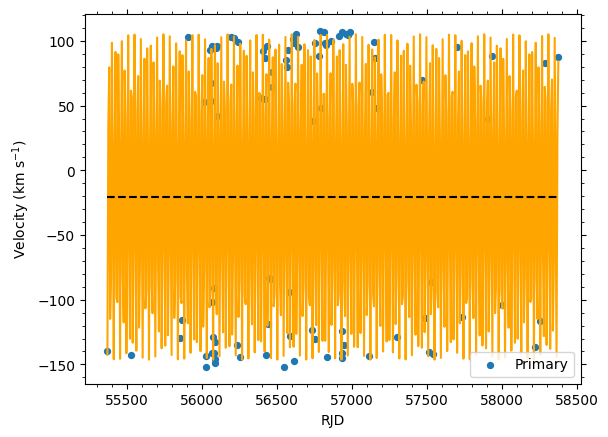

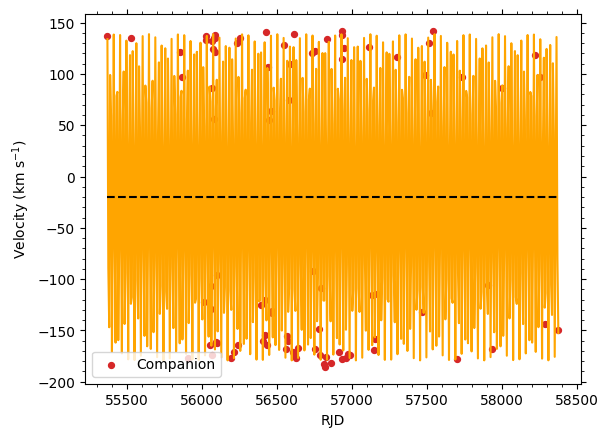

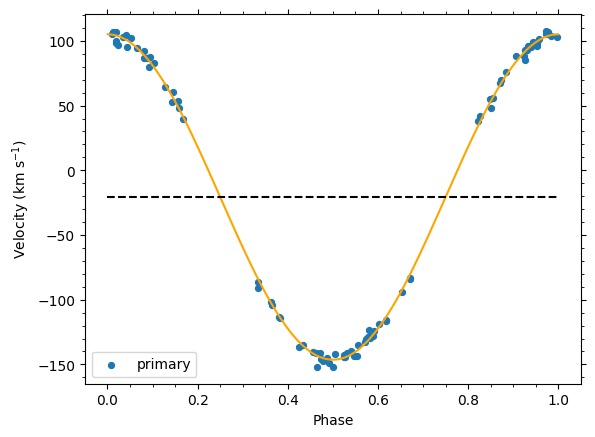

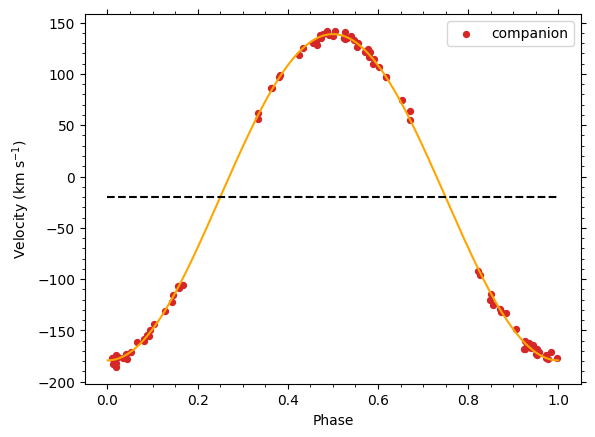

In [ ]:
# fit for the parameters of the secondary star
param2, error2 = StarSolve(data_file = "rv_data_both.txt", star = "both", Pguess = period, zeroEcc = True)

This time, the best fit parameters are saved in the "param2" array and the uncertainties are in the "error2" array. The cell below will pull out the period and semi-amplitude values into their own variables (but the syntax is slightly different than in Step 5).

Add onto the cell to print out the period, K1, and K2 values with their errors and units.

In [ ]:
# Results
period = param2[0,5]        # orbital period
period_error = error2[0,5]  # uncertainty in orbital period

K1 = param2[0,1]            # semi-amplitude of primary
K1_error = error2[0,1]      # uncertainty in semi-amplitude of primary

K2 = param2[1,1]            # semi-amplitude of secondary
K2_error = error2[1,1]      # uncertainty in semi-amplitude of secondary


print('Period = ', period, ' +\- ', period_error, ' days')
print('K1 = ', K1, ' +\- ', K1_error, ' km/s')
print('K2 = ', K2, ' +\- ', K2_error, ' km/s')

Period =  1.1412  +\-  3.61813e-07  days
K1 =  125.75  +\-  0.12217  km/s
K2 =  159.12  +\-  0.12217  km/s


**Question:**

- How do the uncertainties in period and K1 from the combined fit (Step 6) compare to the primary-only fit (Step 5)?

- Do you think it's better to fit the primary and secondary components' orbits separately or together? Why?

## Step 7

Next, write some code to calculate the mass ratio of this binary based on the velocity semi-amplitudes. We'll use this in the next step.


In [ ]:
# code here
mass_ratio = K1 / K2
print(mass_ratio)

0.7902840623428858


# Part 3 - Stellar masses

We can use Kepler's 3rd Law to calculate the combined mass:
$$(m_1+ m_2)P^2  = a^3$$

## Step 8

From the light curve, we know that the binary's semi-major axis is $a$ = 6.45 R$_\odot$. Use this to calculate the combined mass ($m_{tot} = m_1+m_2$).


Hint - 1 AU = 215 R$_\odot$.

In [ ]:
# combined mass
a_AU = 6.45 * 1 / 215       # Rsun --> AU
P_yrs = period / 365.25     # days --> years
mtot = a_AU**3 / P_yrs**2   # Msun
print('Mtot = ', mtot, ' Msun')

Mtot =  2.7657994593935658  Msun


## Step 9

Now we have the mass ratio and the combined mass. What is the individual mass of each star?  Write some code to calculate and print out the mass of each star.

In [ ]:
# code here
# m1 + m2 = mtot
m1 = mtot / (1+mass_ratio)
m2 = mtot / (1+mass_ratio) * mass_ratio

print(' Mass 1 = ', m1, ' Msun')
print(' Mass 2 = ', m2, ' Msun')

 Mass 1 =  1.5448941972784225  Msun
 Mass 2 =  1.2209052621151435  Msun


**Question:** Roughly what spectral types would these stars be?

\


# Bonus

If you have time left over, try putting these stars on an HR diagram.
1. Read in the data in "spt.txt" which has the temperatures and luminosities of different spectral types. Make a plot of the HR diagram with this data.

2. Estimate the luminosity values of the binary component stars in BT Vul from the mass-luminosity relationship. Add these stars as points on your HR diagram, assuming the effective temperatures are 7270 K and 6260 K.

3. Add the Sun to your HR diagram with a different symbol or color, then add a legend to tell all the data points apart.


In [ ]:
# read in spectra type data
data = ascii.read('spt.txt')
tmod = data['temperature']
lmod = data['luminosity']


In [ ]:
# ML relation
L1 = m1**3.5
L2 = m2**3.5

teff1 = 7270
teff2 = 6260


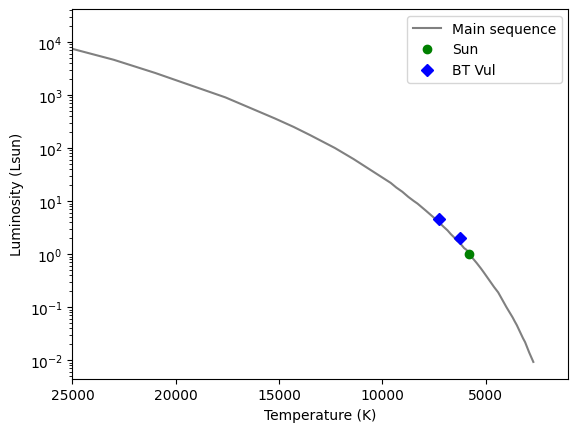

In [ ]:
plt.plot(tmod, lmod, color='grey', label='Main sequence')
plt.plot([5800], [1.0], 'go', label='Sun')
plt.plot([teff1, teff2], [L1, L2], 'bD', label='BT Vul')
plt.xlabel('Temperature (K)')
plt.ylabel('Luminosity (Lsun)')
plt.xlim(25000, 1000)
plt.yscale('log')
plt.legend()
plt.show()


---

## Final instructions
Finish any remaining exercises, then **send me your notebook by Nov 28** to get participation credit. You can download your notebook as an ".ipynb" file and email it, or share the notebook with me through google drive.

\
If you're finishing the activity at home and run into python problems, don't worry about getting the code exactly right. This isn't a coding class and I'm not grading you on how well you know python. If you're stuck, add a text box and explain what you're trying to do *in words*. Then I'll know you have the right idea and know how to apply the content, even if the python code itself is not working. You're also welcome to stop by my office to ask coding questions anytime!